In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
imdb = pd.read_csv('data/IMDB-Movie-Data.csv')
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [27]:
imdb.rename(columns={'Revenue (Millions)':"Revenue", "Runtime (Minutes)":"Runtime"}, inplace=True)
print(imdb.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')


In [29]:
imdb.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",The Dragon Warrior has to clash against the sa...,Ridley Scott,"Gerard Butler, Aaron Eckhart, Morgan Freeman,A...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


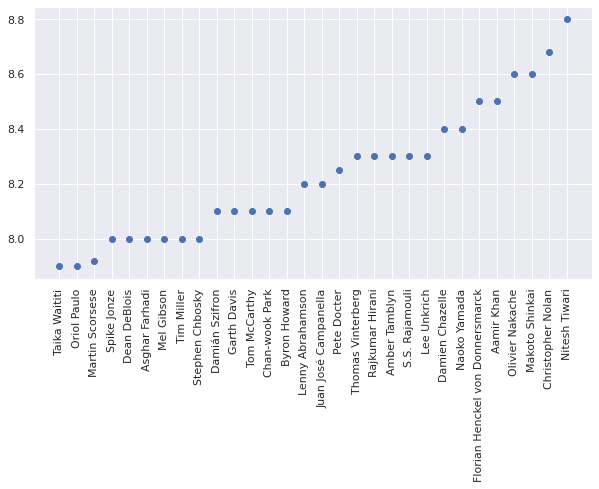

In [57]:
import seaborn as sns
sns.set()
categorical = ["Genre", "Director"]
years = imdb.groupby("Director")["Rating"].mean().reset_index()
years = years.sort_values(by=['Rating'])
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.scatter(years["Director"][-30:], years["Rating"][-30:])

plt.show()

In [58]:
mostearned = imdb[imdb["Revenue"]==imdb["Revenue"].max()]
print(mostearned)

    Rank                                       Title  \
50    51  Star Wars: Episode VII - The Force Awakens   

                       Genre  \
50  Action,Adventure,Fantasy   

                                          Description     Director  \
50  Three decades after the defeat of the Galactic...  J.J. Abrams   

                                               Actors  Year  Runtime  Rating  \
50  Daisy Ridley, John Boyega, Oscar Isaac, Domhna...  2015      136     8.1   

     Votes  Revenue  Metascore  
50  661608   936.63       81.0  


In [59]:
imdb['Rating'].corr(imdb['Metascore'])

0.6318965100387073

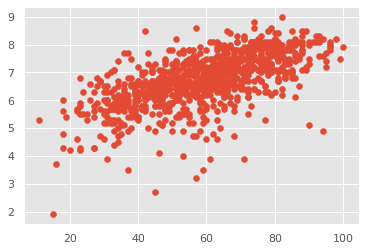

In [61]:
%matplotlib inline
plt.scatter(imdb.Metascore, imdb.Rating)
plt.show()

Rating: 0.21765389419105993


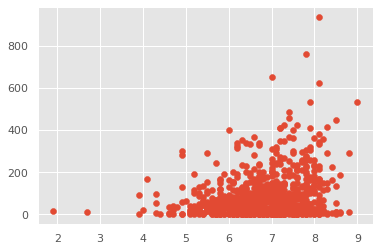

Metascore: 0.14239688118317415


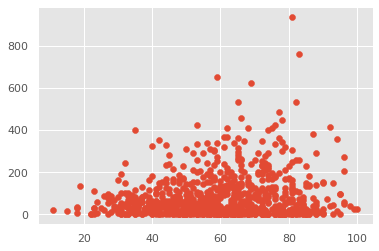

In [67]:
print("Rating:",imdb['Rating'].corr(imdb['Revenue']))
plt.scatter(imdb.Rating, imdb.Revenue)
plt.show()
print("Metascore:",imdb['Metascore'].corr(imdb['Revenue']))

plt.scatter(imdb.Metascore, imdb.Revenue)
plt.show()